# For a Better Criminal Justice System: Analyzing Recidivism and Prison Populations in the US

#### Data sourced from:
- [Sentencing Project, State Imprisonment Rate](https://www.sentencingproject.org/the-facts/#rankings)
    - "Research on incarceration has traditionally centered on state-level data: specifically state prison populations or the statewide combined prison and jail population. Using the state as the unit of analysis is sufficient for understanding the broad contours of incarceration in the United States, but it does not provide the level of detail necessary to unpack its causes and consequences."
    
-[Bureau of Justice Statistics, National Prisoners Statistics Program](https://www.kaggle.com/christophercorrea/prisoners-and-crime-in-united-states?select=crime_and_incarceration_by_state.csv)

    - "The Bureau of Justice Statistics administers the National Prisoners Statistics Program (NPS), an annual data collection effort that began in response to a 1926 congressional mandate. The population statistics reflect each state's prisoner population as of December 31 for the recorded year. Prisoners listed under federal jurisdiction are incarcerated by the U.S. Bureau of Prisons."
    
- [Iowa Department of Corrections](https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4), [Kaggle, slonnadube](https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison)
    - "This dataset reports whether an offender is re-admitted to prison or not within three years from being released from prison in Iowa. The recidivism reporting year is the fiscal year (year ending June 30) marking the end of the three year tracking period.
       The Department of Corrections uses recidivism as an indicator on whether strategies are reducing offenders relapse into criminal behavior. A three year time frame is used as studies have shown if an offender relapses into criminal behavior it is most likely to happen within three years of being released."
       
- [Prison Policy Initiative](https://www.prisonpolicy.org/profiles/)

## Directory
### 1. Importing Necessary Libraries
### 2. Importing Datasets, Merging, and Inspecting Data
### 3. Cleaning and Converting Data
### 4. Auto EDA, Prep for Focused EDA
### 5. Focused EDA, Data Touch-up
### 6. Time Analysis EDA
### 7. Prep for Modeling
### 8. Preliminary Model Analysis 
### 9A. Model Tuning with SMOTE
### 9B. Model Tuning with Feature Selection, Hyperparameter Tuning via Gridsearch and SMOTE
### 10. Model Review and Conclusion


## 1. Importing Necessary Libraries

In [177]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib.patches import Patch
from matplotlib import pyplot
plt.style.use('ggplot')
from imblearn.over_sampling import SMOTE

import pandas as pd
from pandas import Grouper
from pandas.plotting import lag_plot

from pandas import datetime


import seaborn as sns

## Time series libraries
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller, Mapper, InvertibleMapper

import statsmodels.api as sm
import plotly.express as px
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.stattools import adfuller
import altair as alt


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Classification libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

## Auto EDA
from ClfAutoEDA import *

from numpy import log


import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import warnings

## 2. Importing Datasets, Merging, and Inspecting Data

## JAIL POPULATION

#### According to The Sentencing Project's analysis of state incarceration populations:
    - Louisiana ranks 1st with 680 imprisoned per 100k. 
    - Pennsylvania ranks 25th with 355 per 100k. 
    - Iowa ranks 35th with 293 per 100k.
    - Massachusetts ranks 50th with 133 per 100k. 
    
#### As of May 2021, Iowa is the only state publicly providing incarceration records and recidivism rates. 
#### For comparison sake, we'll show growth across the above four states and then analyze Iowa's recidivism information. 

#### Crime and Incarceration by State

In [178]:
st_data=pd.read_csv('prison_custody_by_state.csv')
st_data.head()

,jurisdiction,includes_jails,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,0,"149,852","158,216","168,144","177,600","186,364","190,844","197,285","198,414","205,087","206,968","214,774","216,915","214,989","209,561","195,622","188,311"
1,Alabama,0,"24,741","25,100","27,614","25,635","24,315","24,103","25,253","25,363","27,241","27,345","26,813","26,768","26,825","26,145","25,212","23,745"
2,Alaska,1,"4,570","4,351","4,472","4,534","4,798","5,052","5,151","4,997","5,472","5,369","6,216","6,308","5,081","6,323","5,247","4,378"
3,Arizona,0,"27,710","29,359","31,084","32,384","33,345","35,752","37,700","39,455","40,544","40,130","39,949","40,013","41,031","42,136","42,204","42,248"
4,Arkansas,0,"11,489","11,849","12,068","12,577","12,455","12,854","13,275","13,135","13,338","14,192","14,090","14,043","14,295","15,250","15,784","15,833"


In [179]:
st_data.describe()

,includes_jails
count,51.000000
mean,0.117647
std,0.325396
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [180]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jurisdiction    51 non-null     object
 1   includes_jails  51 non-null     int64 
 2   2001            51 non-null     object
 3   2002            51 non-null     object
 4   2003            51 non-null     object
 5   2004            51 non-null     object
 6   2005            51 non-null     object
 7   2006            51 non-null     object
 8   2007            51 non-null     object
 9   2008            51 non-null     object
 10  2009            51 non-null     object
 11  2010            51 non-null     object
 12  2011            51 non-null     object
 13  2012            51 non-null     object
 14  2013            51 non-null     object
 15  2014            51 non-null     object
 16  2015            51 non-null     object
 17  2016            51 non-null     object
dtypes: int64(1),

In [181]:
st_data['jurisdiction'].value_counts()

Missouri          1
Texas             1
New York          1
Nevada            1
California        1
Ohio              1
Mississippi       1
Utah              1
Federal           1
Connecticut       1
Michigan          1
Alabama           1
New Mexico        1
Virginia          1
Kansas            1
Maine             1
Iowa              1
Illinois          1
Tennessee         1
North Carolina    1
Wyoming           1
Nebraska          1
Arizona           1
Florida           1
Washington        1
Vermont           1
Rhode Island      1
Arkansas          1
West Virginia     1
Maryland          1
Massachusetts     1
South Dakota      1
Colorado          1
Georgia           1
Wisconsin         1
Alaska            1
North Dakota      1
Louisiana         1
Indiana           1
Idaho             1
New Jersey        1
New Hampshire     1
Oklahoma          1
Minnesota         1
South Carolina    1
Kentucky          1
Montana           1
Hawaii            1
Delaware          1
Oregon            1


In [182]:
st_data.isnull().sum()

jurisdiction      0
includes_jails    0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
dtype: int64

In [183]:
st_data =st_data.dropna()
st_data.isnull().sum()

jurisdiction      0
includes_jails    0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
dtype: int64

#### Dropping unnecessary columns

In [184]:
st_data = st_data.drop(['includes_jails'], axis = 1)

In [185]:
st_data.head()

,jurisdiction,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,"149,852","158,216","168,144","177,600","186,364","190,844","197,285","198,414","205,087","206,968","214,774","216,915","214,989","209,561","195,622","188,311"
1,Alabama,"24,741","25,100","27,614","25,635","24,315","24,103","25,253","25,363","27,241","27,345","26,813","26,768","26,825","26,145","25,212","23,745"
2,Alaska,"4,570","4,351","4,472","4,534","4,798","5,052","5,151","4,997","5,472","5,369","6,216","6,308","5,081","6,323","5,247","4,378"
3,Arizona,"27,710","29,359","31,084","32,384","33,345","35,752","37,700","39,455","40,544","40,130","39,949","40,013","41,031","42,136","42,204","42,248"
4,Arkansas,"11,489","11,849","12,068","12,577","12,455","12,854","13,275","13,135","13,338","14,192","14,090","14,043","14,295","15,250","15,784","15,833"


#### Converting year columns into rows

In [186]:
st_data = st_data.melt(id_vars=["jurisdiction"], 
        var_name="Year", 
        value_name="Prison Population")

In [187]:
st_data.head()

,jurisdiction,Year,Prison Population
0,Federal,2001,"149,852"
1,Alabama,2001,"24,741"
2,Alaska,2001,"4,570"
3,Arizona,2001,"27,710"
4,Arkansas,2001,"11,489"


In [188]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   jurisdiction       816 non-null    object
 1   Year               816 non-null    object
 2   Prison Population  816 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


#### Creating list for individual state analysis.

In [189]:
STATES = ['Louisiana', 'Pennsylvania', 'Iowa','Massachusetts']

In [190]:
st_data=st_data[st_data.jurisdiction.isin(STATES)]
st_data.head()

,jurisdiction,Year,Prison Population
15,Iowa,2001,"7,962"
18,Louisiana,2001,"19,660"
21,Massachusetts,2001,"10,203"
38,Pennsylvania,2001,"37,641"
66,Iowa,2002,"8,398"


In [191]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 15 to 803
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   jurisdiction       64 non-null     object
 1   Year               64 non-null     object
 2   Prison Population  64 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


#### Renaming 'jurisdiction' column to 'State'

In [192]:
st_data = st_data.rename(columns={"jurisdiction": "State"})

In [193]:
st_data.head()

,State,Year,Prison Population
15,Iowa,2001,"7,962"
18,Louisiana,2001,"19,660"
21,Massachusetts,2001,"10,203"
38,Pennsylvania,2001,"37,641"
66,Iowa,2002,"8,398"


#### Converting st_data to datetime

In [194]:
st_data.Year = pd.to_datetime(st_data.Year, format='%Y')

In [195]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 15 to 803
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   State              64 non-null     object        
 1   Year               64 non-null     datetime64[ns]
 2   Prison Population  64 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.0+ KB


#### Cleaning up data before pivoting 

In [196]:
st_data = st_data.replace(',','', regex=True)

In [197]:
st_data["Prison Population"] = st_data["Prison Population"].astype(float)

#### Pivoting st_data for EDA

In [198]:
st_data = pd.pivot_table(st_data, values=['Prison Population'], index='Year',
                    columns=['State'])
st_data.head()

Prison Population                                     
State                   Iowa Louisiana Massachusetts Pennsylvania
Year                                                             
2001-01-01            7962.0   19660.0       10203.0      37641.0
2002-01-01            8398.0   20010.0        9879.0      39724.0
2003-01-01            8546.0   19498.0        9828.0      40879.0
2004-01-01            8525.0   19470.0        9825.0      40506.0
2005-01-01            8737.0   19371.0       10348.0      41941.0

In [199]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2001-01-01 to 2016-01-01
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (Prison Population, Iowa)           16 non-null     float64
 1   (Prison Population, Louisiana)      16 non-null     float64
 2   (Prison Population, Massachusetts)  16 non-null     float64
 3   (Prison Population, Pennsylvania)   16 non-null     float64
dtypes: float64(4)
memory usage: 640.0 bytes


### IOWA RECIDIVISM  1
##### Having sourced two incomplete datsets on Iowa recidivism, both need to be cleaned and joined 

In [200]:
df_IR = pd.read_csv('3YearIowa.csv')
df_IR.head()

,Fiscal Year Released,Recidivism Reporting Year,Main Supervising District,Release Type,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,NaN,NaN,No


In [201]:
df_IR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year Released        26020 non-null  int64  
 1   Recidivism Reporting Year   26020 non-null  int64  
 2   Main Supervising District   16439 non-null  object 
 3   Release Type                24258 non-null  object 
 4   Race - Ethnicity            25990 non-null  object 
 5   Age At Release              26017 non-null  object 
 6   Sex                         26017 non-null  object 
 7   Offense Classification      26020 non-null  object 
 8   Offense Type                26020 non-null  object 
 9   Offense Subtype             26020 non-null  object 
 10  Return to Prison            26020 non-null  object 
 11  Days to Return              8681 non-null   float64
 12  Recidivism Type             26020 non-null  object 
 13  New Offense Classification  671

##### Narrowing dataframe for merging 

In [202]:
df_IR = df_IR[['Fiscal Year Released', 'Race - Ethnicity', 'Main Supervising District', 'Sex',
              'Recidivism Type', 'Age At Release ']]

In [203]:
df_IR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Fiscal Year Released       26020 non-null  int64 
 1   Race - Ethnicity           25990 non-null  object
 2   Main Supervising District  16439 non-null  object
 3   Sex                        26017 non-null  object
 4   Recidivism Type            26020 non-null  object
 5   Age At Release             26017 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [204]:
df_IR.head()

,Fiscal Year Released,Race - Ethnicity,Main Supervising District,Sex,Recidivism Type,Age At Release
0,2010,Black - Non-Hispanic,7JD,Male,New,25-34
1,2010,White - Non-Hispanic,NaN,Male,Tech,25-34
2,2010,White - Non-Hispanic,5JD,Male,Tech,35-44
3,2010,White - Non-Hispanic,6JD,Male,No Recidivism,25-34
4,2010,Black - Non-Hispanic,NaN,Male,Tech,35-44


### IOWA RECIDIVISM 2

In [205]:
df_RI = pd.read_csv('3year_Iowa.csv')
df_RI.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


In [206]:
df_RI.isnull().sum()

Fiscal Year Released                            0
Recidivism Reporting Year                       0
Race - Ethnicity                               30
Age At Release                                  3
Convicting Offense Classification               0
Convicting Offense Type                         0
Convicting Offense Subtype                      0
Main Supervising District                    9581
Release Type                                 1762
Release type: Paroled to Detainder united    1762
Part of Target Population                       0
Recidivism - Return to Prison numeric           0
dtype: int64

In [207]:
df_RI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Fiscal Year Released                       26020 non-null  int64 
 1   Recidivism Reporting Year                  26020 non-null  int64 
 2   Race - Ethnicity                           25990 non-null  object
 3   Age At Release                             26017 non-null  object
 4   Convicting Offense Classification          26020 non-null  object
 5   Convicting Offense Type                    26020 non-null  object
 6   Convicting Offense Subtype                 26020 non-null  object
 7   Main Supervising District                  16439 non-null  object
 8   Release Type                               24258 non-null  object
 9   Release type: Paroled to Detainder united  24258 non-null  object
 10  Part of Target Population         

##### Comparing 'Release Type' columns

In [208]:
df_RI['Release type: Paroled to Detainder united'].value_counts()

Parole                        15722
Discharged End of Sentence     7374
Special Sentence                748
Paroled to Detainer             414
Name: Release type: Paroled to Detainder united, dtype: int64

In [209]:
df_RI['Release Type'].value_counts()

Parole                                 15721
Discharged End of Sentence              7374
Special Sentence                         748
Paroled to Detainer - Out of State       137
Paroled to Detainer - INS                134
Paroled to Detainer - U.S. Marshall       77
Paroled to Detainer - Iowa                66
Interstate Compact Parole                  1
Name: Release Type, dtype: int64

## Final Dataset (Data - Merged Iowa)

In [210]:
data = df_RI.join(df_IR, rsuffix="_right")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Fiscal Year Released                       26020 non-null  int64 
 1   Recidivism Reporting Year                  26020 non-null  int64 
 2   Race - Ethnicity                           25990 non-null  object
 3   Age At Release                             26017 non-null  object
 4   Convicting Offense Classification          26020 non-null  object
 5   Convicting Offense Type                    26020 non-null  object
 6   Convicting Offense Subtype                 26020 non-null  object
 7   Main Supervising District                  16439 non-null  object
 8   Release Type                               24258 non-null  object
 9   Release type: Paroled to Detainder united  24258 non-null  object
 10  Part of Target Population         

##### Narrowing and ordering final dataframe

In [211]:
data = data[['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity', 'Sex', 'Age At Release ',
            'Convicting Offense Classification', 'Convicting Offense Type', 'Convicting Offense Subtype',
            'Release type: Paroled to Detainder united', 'Part of Target Population', 'Recidivism - Return to Prison numeric']]

In [212]:
data.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Male,Under 25,D Felony,Violent,Assault,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,Male,55 and Older,D Felony,Public Order,OWI,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,Male,25-34,D Felony,Property,Burglary,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,Male,55 and Older,C Felony,Drug,Trafficking,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,Male,25-34,D Felony,Drug,Trafficking,Parole,Yes,1


## 3. Cleaning and Converting Data

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Fiscal Year Released                       26020 non-null  int64 
 1   Recidivism Reporting Year                  26020 non-null  int64 
 2   Race - Ethnicity                           25990 non-null  object
 3   Sex                                        26017 non-null  object
 4   Age At Release                             26017 non-null  object
 5   Convicting Offense Classification          26020 non-null  object
 6   Convicting Offense Type                    26020 non-null  object
 7   Convicting Offense Subtype                 26020 non-null  object
 8   Release type: Paroled to Detainder united  24258 non-null  object
 9   Part of Target Population                  26020 non-null  object
 10  Recidivism - Return to Prison nume

##### Renaming columns for comprehension and ease of use

In [214]:
data = data.rename(columns={"Recidivism - Return to Prison numeric": "Recidivism", "Race - Ethnicity":'Ethnicity',
                           "Release type: Paroled to Detainder united": "Release Type"})

In [215]:
data.head()

,Fiscal Year Released,Recidivism Reporting Year,Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Part of Target Population,Recidivism
0,2010,2013,White - Non-Hispanic,Male,Under 25,D Felony,Violent,Assault,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,Male,55 and Older,D Felony,Public Order,OWI,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,Male,25-34,D Felony,Property,Burglary,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,Male,55 and Older,C Felony,Drug,Trafficking,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,Male,25-34,D Felony,Drug,Trafficking,Parole,Yes,1


##### Examining missing values and cleaning up data before Auto EDA

In [216]:
data.isnull().sum()

Fiscal Year Released                    0
Recidivism Reporting Year               0
Ethnicity                              30
Sex                                     3
Age At Release                          3
Convicting Offense Classification       0
Convicting Offense Type                 0
Convicting Offense Subtype              0
Release Type                         1762
Part of Target Population               0
Recidivism                              0
dtype: int64

In [217]:
data['Recidivism'].value_counts()

0    17339
1     8681
Name: Recidivism, dtype: int64

In [218]:
data['Ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: Ethnicity, dtype: int64

##### Converting nans for 'Ethnicity' to 'unknown'

In [219]:
data['Ethnicity'] = data['Ethnicity'].fillna('Unknown')

In [220]:
data['Ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
Unknown                                               30
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: Ethnicity, dtype: int64

##### Dropping nans for 'Release Type,' 'Sex,' 'Age At Release'

In [221]:
data = data.dropna()

In [222]:
data.isnull().sum()

Fiscal Year Released                 0
Recidivism Reporting Year            0
Ethnicity                            0
Sex                                  0
Age At Release                       0
Convicting Offense Classification    0
Convicting Offense Type              0
Convicting Offense Subtype           0
Release Type                         0
Part of Target Population            0
Recidivism                           0
dtype: int64

##### Writing above dataframes to .csv for separate notebooks

In [223]:
#Population for time series analysis
st_data.to_csv('national_prison_pop.csv', index=False)

#Iowa
data.to_csv('data_for_EDA.csv', index=False)

## 4. Auto EDA, Prep for Focused EDA

The data looks like this: 
    Fiscal Year Released  Recidivism Reporting Year             Ethnicity  \
0                  2010                       2013  White - Non-Hispanic   
1                  2010                       2013  White - Non-Hispanic   
2                  2010                       2013  White - Non-Hispanic   
3                  2010                       2013  White - Non-Hispanic   
4                  2010                       2013  Black - Non-Hispanic   

    Sex Age At Release  Convicting Offense Classification  \
0  Male        Under 25                          D Felony   
1  Male    55 and Older                          D Felony   
2  Male           25-34                          D Felony   
3  Male    55 and Older                          C Felony   
4  Male           25-34                          D Felony   

  Convicting Offense Type Convicting Offense Subtype Release Type  \
0                 Violent                    Assault       Parole   
1         

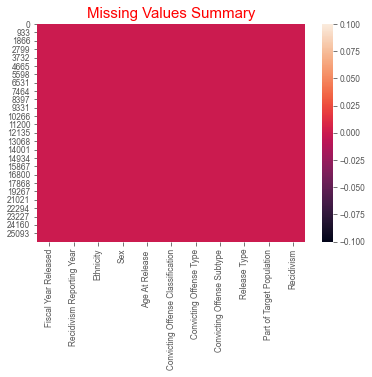

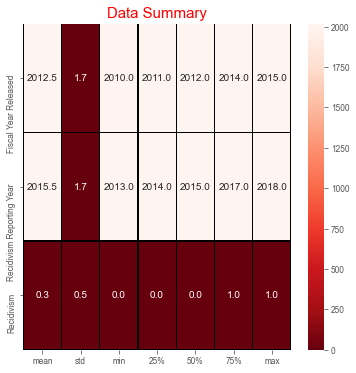

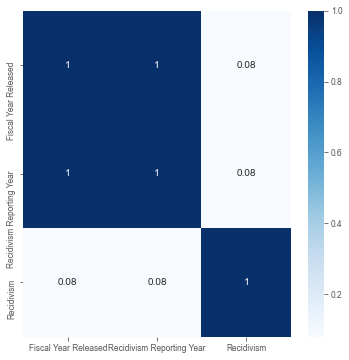

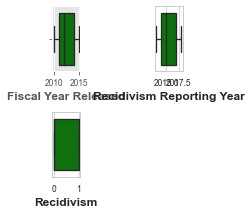

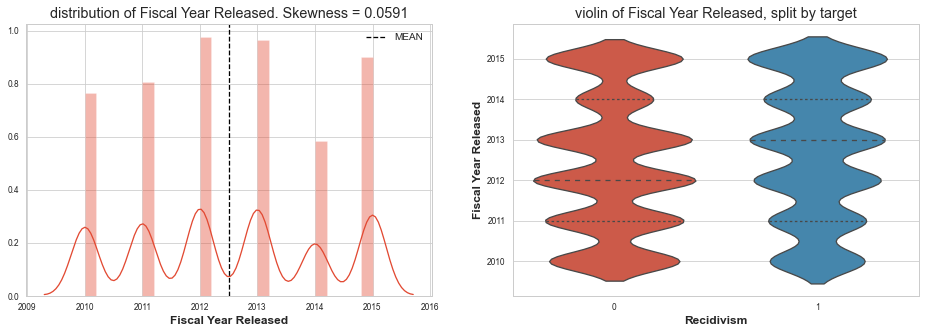

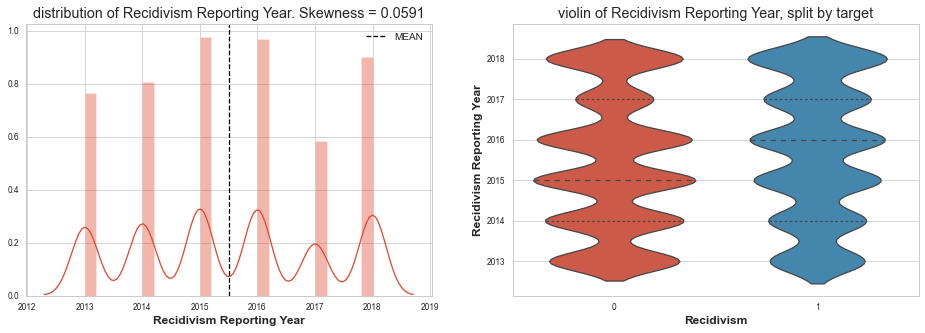

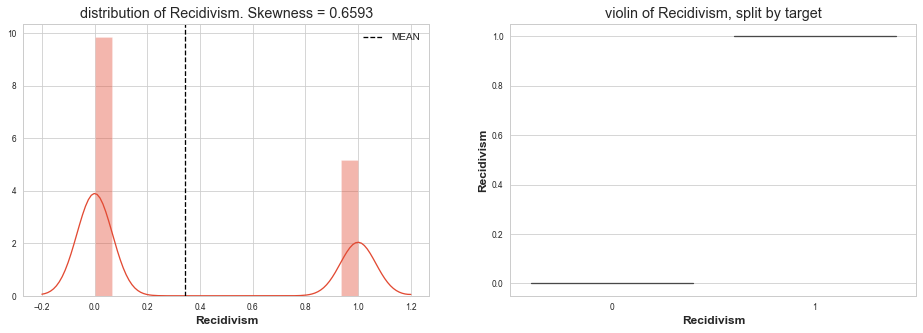

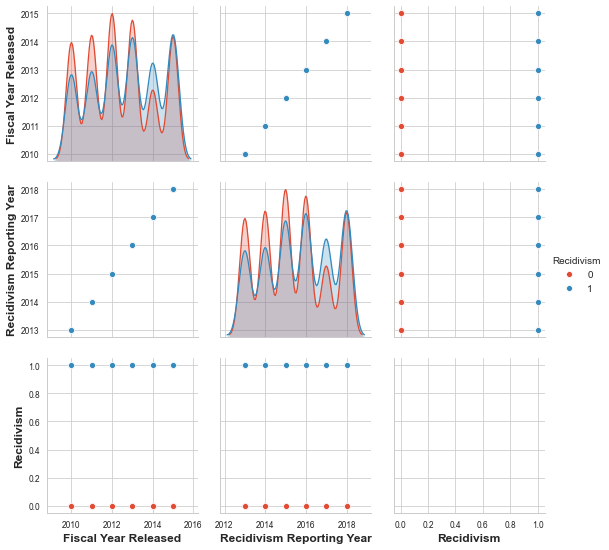

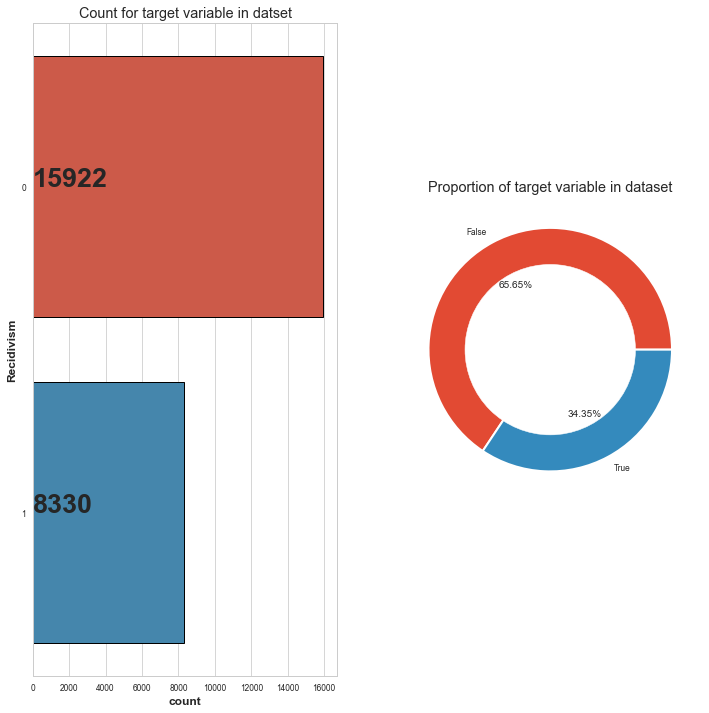

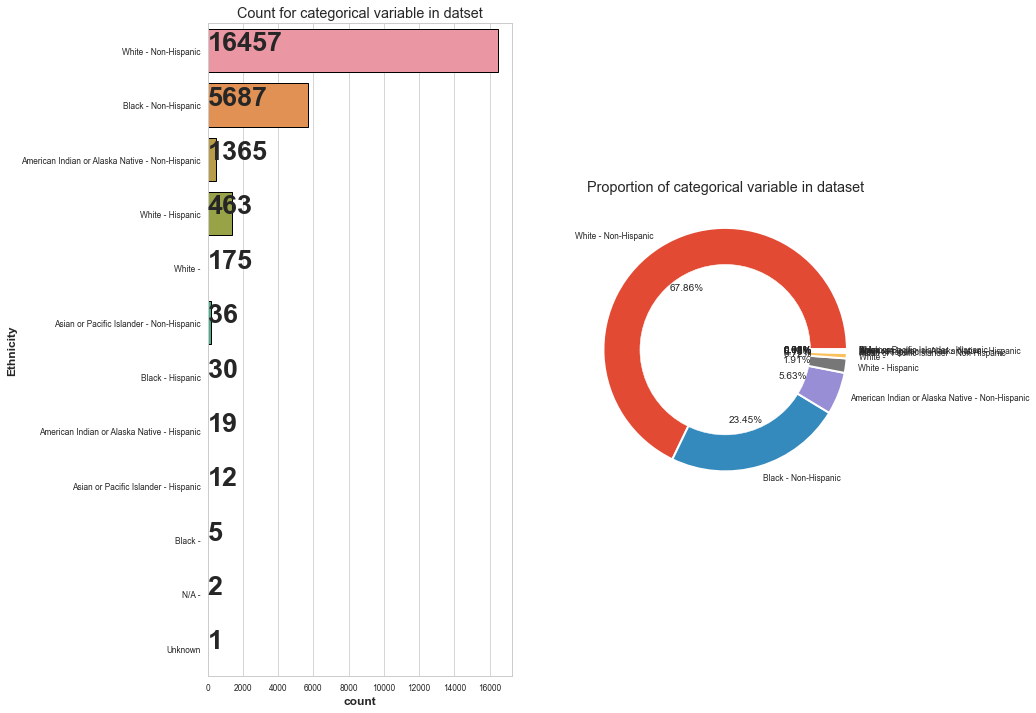

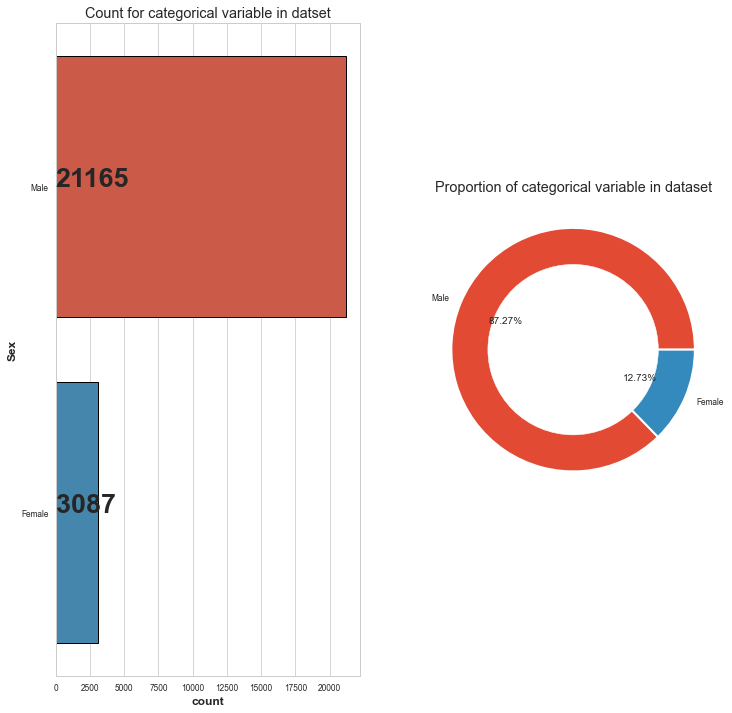

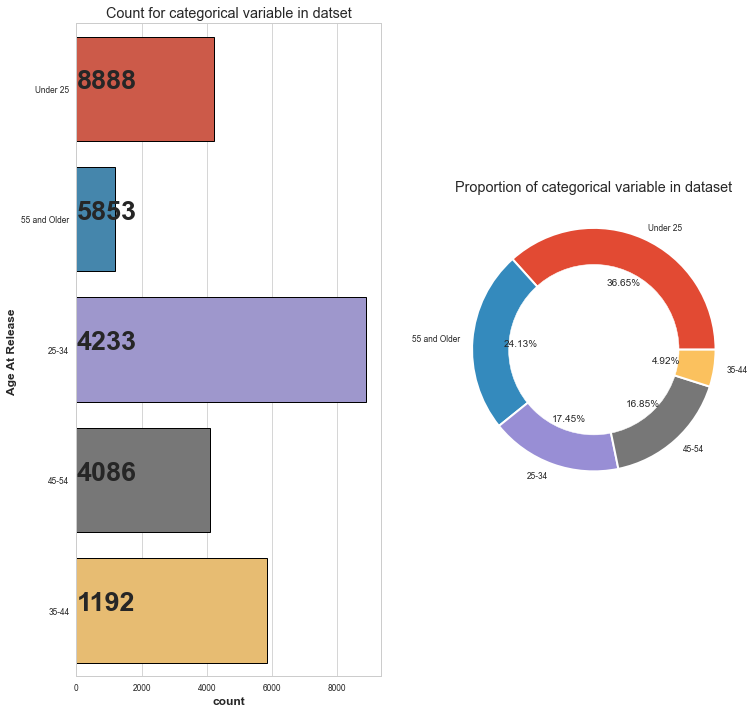

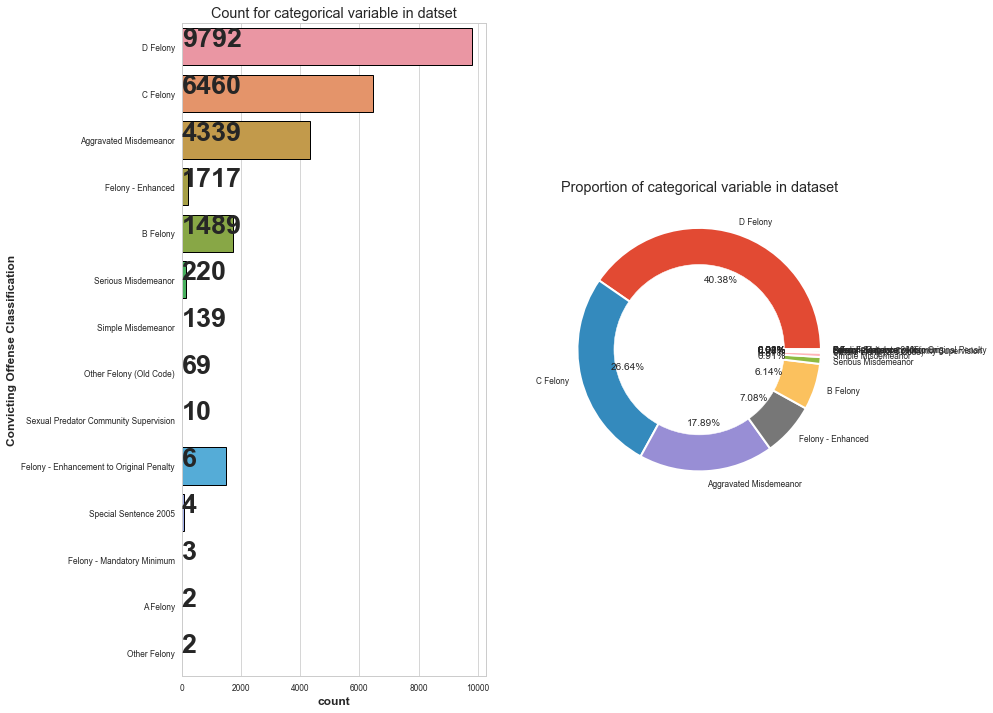

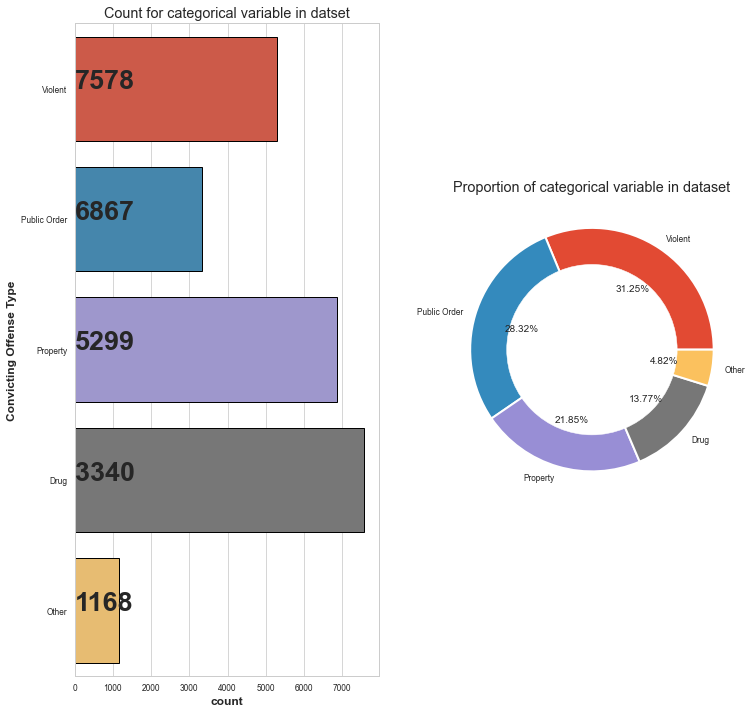

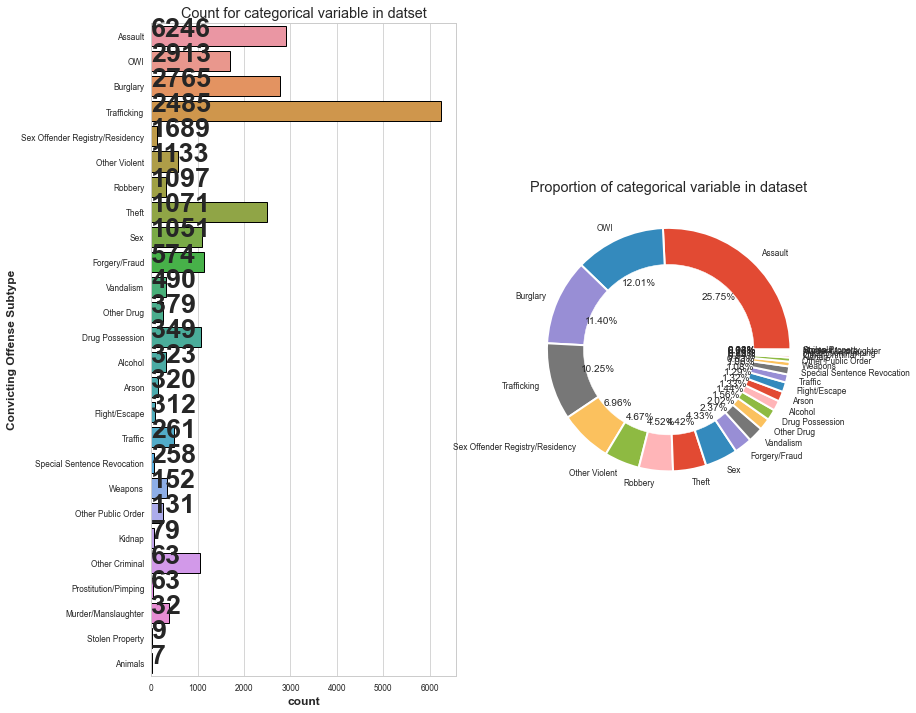

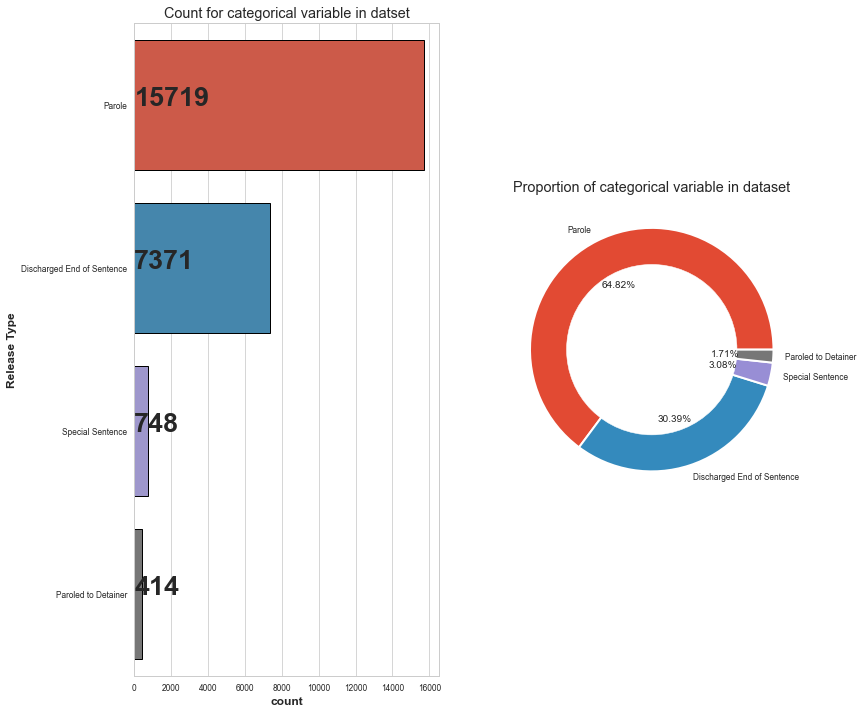

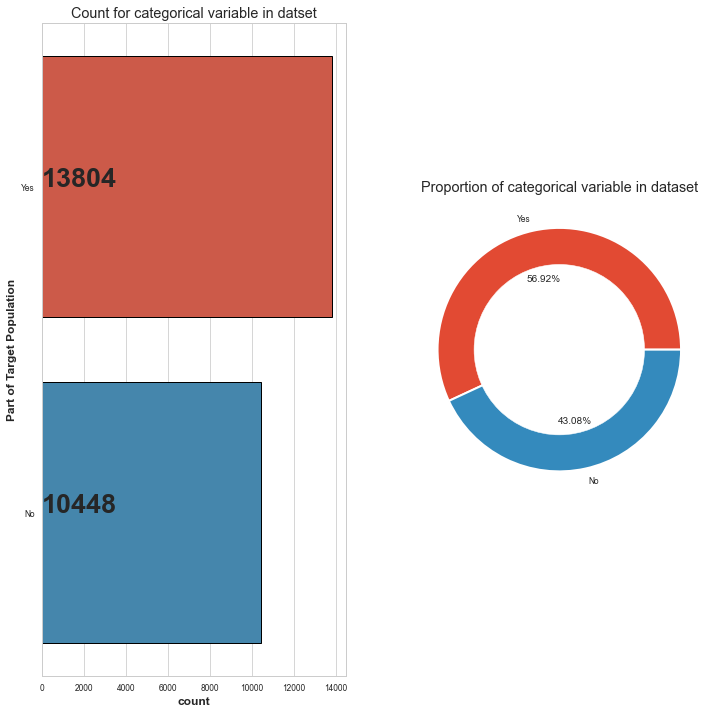

In [224]:
labels=["False","True"]
target_variable_name='Recidivism'
data,num_features,cat_features=EDA(data,labels,
                                         target_variable_name,
                                         data_summary_figsize=(6,6),
                                         corr_matrix_figsize=(6,6),
                                         corr_matrix_annot=True,
                                         pairplt=True)

#### Takeaways: 
1. 'Convicting Offense Classification' may need cleaning 
2. 'Part of Target Population' needs further analysis
3. 'Ethnicity' may need cleaning

## 5. Focused EDA, Data Touch-up

##### General Overview of Recidivism

Recidivism Count
Recidivism
0    15922
1     8330
Name: Recidivism, dtype: int64


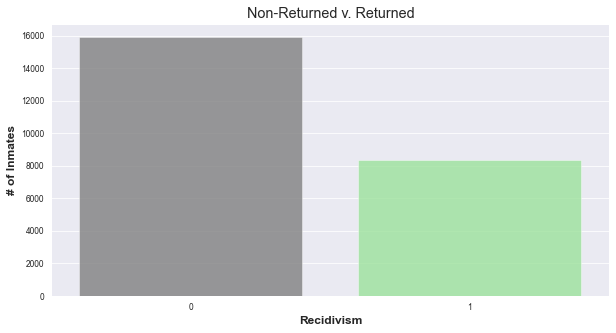

In [225]:
# breakdown of recidivism distribution
print('Recidivism Count')
print(data.groupby(['Recidivism']).Recidivism.count())

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(data['Recidivism'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Non-Returned v. Returned')
plt.ylabel('# of Inmates')
plt.show()

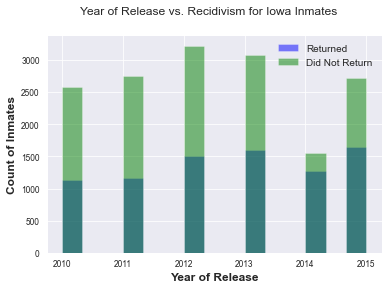

In [226]:
# breakdown of recidivism distribution across release years
fig, ax = plt.subplots()

ax.hist(data[data["Recidivism"]==1]["Fiscal Year Released"], bins=15, alpha=0.5, color="blue", label="Returned")
ax.hist(data[data["Recidivism"]==0]["Fiscal Year Released"], bins=15, alpha=0.5, color="green", label="Did Not Return")

ax.set_xlabel("Year of Release")
ax.set_ylabel("Count of Inmates")

fig.suptitle("Year of Release vs. Recidivism for Iowa Inmates")

ax.legend();

#### Convicting offense type and classification investigation 

In [227]:
data['Convicting Offense Classification'].value_counts()

D Felony                                    9792
C Felony                                    6460
Aggravated Misdemeanor                      4339
B Felony                                    1717
Felony - Enhancement to Original Penalty    1489
Felony - Enhanced                            220
Serious Misdemeanor                          139
Special Sentence 2005                         69
Felony - Mandatory Minimum                    10
Other Felony                                   6
A Felony                                       4
Simple Misdemeanor                             3
Sexual Predator Community Supervision          2
Other Felony (Old Code)                        2
Name: Convicting Offense Classification, dtype: int64

In [228]:
# taking a closer look at 'convicting offense classification' to see if we can combine or eliminate certain rows
pie_me = data['Convicting Offense Classification'].value_counts().reset_index()
pie_me.columns = ['Convicting Offense Classification', 'count']

fig = px.pie(
    pie_me, 
    values='count', 
    names='Convicting Offense Classification',  
    title='Offense Classification', 
    width=600, 
    height=600
)

fig.show()

Text(0.5, 0.98, 'Recidivism with Convicting Offense Classification')

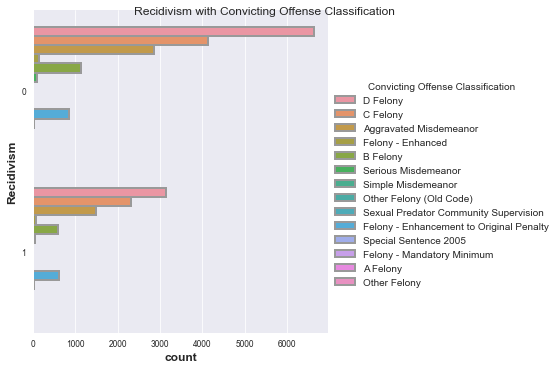

In [229]:
# checking recidivism and 'convicting offense classification'
ax = sns.catplot(y="Recidivism", hue="Convicting Offense Classification", kind="count",
            edgecolor=".6",
            data=data, linewidth=2)
ax.fig.suptitle('Recidivism with Convicting Offense Classification')

In [230]:
pd.crosstab(data['Convicting Offense Classification'], data['Recidivism'], normalize='index')

Recidivism,0,1
Convicting Offense Classification,,
A Felony,1.000000,0.000000
Aggravated Misdemeanor,0.657064,0.342936
B Felony,0.660454,0.339546
C Felony,0.640402,0.359598
D Felony,0.677900,0.322100
Felony - Enhanced,0.650000,0.350000
Felony - Enhancement to Original Penalty,0.580927,0.419073
Felony - Mandatory Minimum,0.800000,0.200000
Other Felony,0.500000,0.500000


Convicting Offense Type
Convicting Offense Type
Drug            7578
Other           1168
Property        6867
Public Order    3340
Violent         5299
Name: Convicting Offense Type, dtype: int64


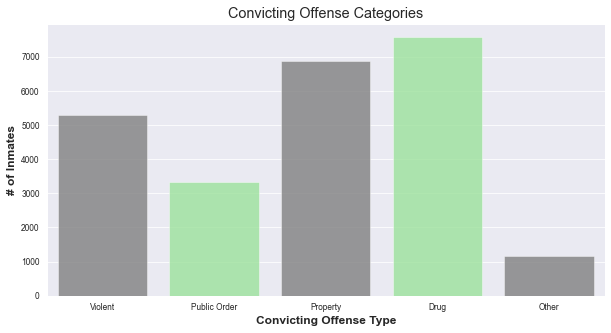

In [231]:
# overview of 'convicting offense type' - will be a useful category to cross reference against other features
print('Convicting Offense Type')
print(data.groupby(['Convicting Offense Type'])['Convicting Offense Type'].count())

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(data['Convicting Offense Type'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Convicting Offense Categories')
plt.ylabel('# of Inmates')
plt.show()

##### Cleaning/investigating ethnicity and recidivism 

In [232]:
# overview of ethnicity and recidivism 
pie_me = data['Ethnicity'].value_counts().reset_index()
pie_me.columns = ['Ethnicity', 'count']

fig = px.pie(
    pie_me, 
    values='count', 
    names='Ethnicity',  
    title='Ethnicity Distribution', 
    width=600, 
    height=600
)

fig.show()

In [233]:
# checking if we need to clean or combine any rows
data['Ethnicity'].value_counts()

White - Non-Hispanic                               16457
Black - Non-Hispanic                                5687
White - Hispanic                                    1365
American Indian or Alaska Native - Non-Hispanic      463
Asian or Pacific Islander - Non-Hispanic             175
Black - Hispanic                                      36
Unknown                                               30
American Indian or Alaska Native - Hispanic           19
White -                                               12
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
N/A -                                                  1
Name: Ethnicity, dtype: int64

##### Converting ethnicity values with a count of less than 4 into 'other,' dropping 'White -' values and 'Other' values

In [234]:
data[['Ethnicity']] = data[['Ethnicity']].where(data.apply(lambda x: x.groupby(x).transform('count')>4), 'Other')

In [235]:
data = data[data['Ethnicity'] != 'White -']

In [236]:
data = data[data['Ethnicity'] != 'Other']

##### Taking a closer look at ethnicity and recidivism

In [237]:
data['Ethnicity'].value_counts()

White - Non-Hispanic                               16457
Black - Non-Hispanic                                5687
White - Hispanic                                    1365
American Indian or Alaska Native - Non-Hispanic      463
Asian or Pacific Islander - Non-Hispanic             175
Black - Hispanic                                      36
Unknown                                               30
American Indian or Alaska Native - Hispanic           19
Asian or Pacific Islander - Hispanic                   5
Name: Ethnicity, dtype: int64

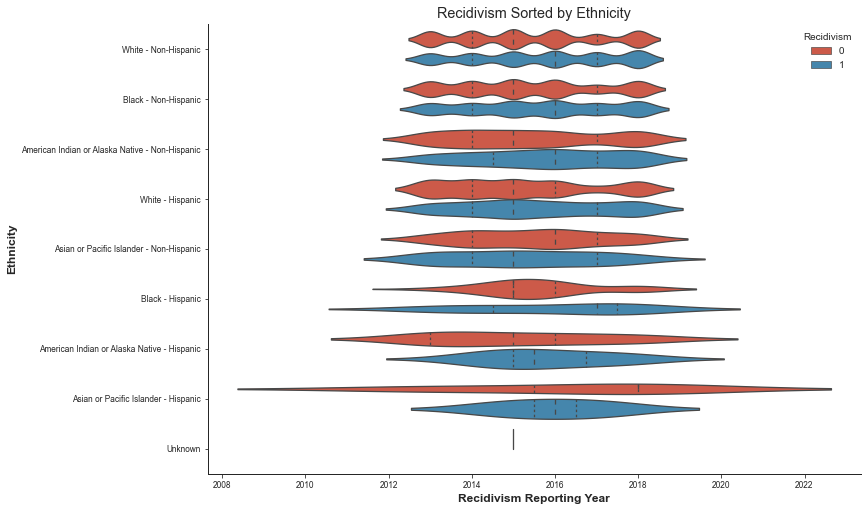

In [238]:
# plotting ethnicity by reporting year 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="Recidivism Reporting Year", y="Ethnicity", hue="Recidivism",
            kind="violin", data=data, inner="quart", ax=ax).set_title('Recidivism Sorted by Ethnicity')    
sns.despine()

In [239]:
pd.crosstab(data.Ethnicity, data.Recidivism, normalize='index')

Recidivism,0,1
Ethnicity,,
American Indian or Alaska Native - Hispanic,0.684211,0.315789
American Indian or Alaska Native - Non-Hispanic,0.596112,0.403888
Asian or Pacific Islander - Hispanic,0.600000,0.400000
Asian or Pacific Islander - Non-Hispanic,0.748571,0.251429
Black - Hispanic,0.694444,0.305556
Black - Non-Hispanic,0.654651,0.345349
Unknown,1.000000,0.000000
White - Hispanic,0.778022,0.221978
White - Non-Hispanic,0.646837,0.353163


##### Dropping 'unknown' from 'Ethnicity' as it does not provide any useful insights. 

In [240]:
data = data[data['Ethnicity'] != 'Unknown']

In [241]:
data['Ethnicity'].value_counts()

White - Non-Hispanic                               16457
Black - Non-Hispanic                                5687
White - Hispanic                                    1365
American Indian or Alaska Native - Non-Hispanic      463
Asian or Pacific Islander - Non-Hispanic             175
Black - Hispanic                                      36
American Indian or Alaska Native - Hispanic           19
Asian or Pacific Islander - Hispanic                   5
Name: Ethnicity, dtype: int64

Text(0.5, 0.98, 'Recidvism Distribution Sorted by Sex and Ethnicity')

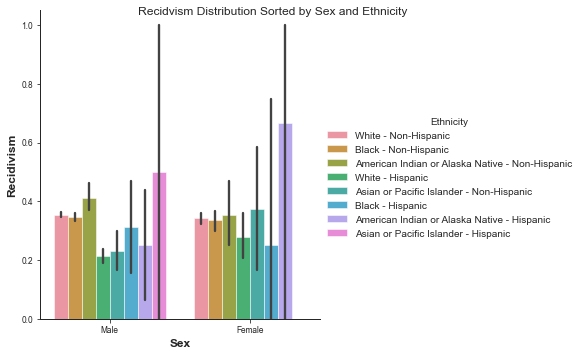

In [242]:
# ethnicity/sex offense type
ax = sns.catplot(x="Sex", y="Recidivism", hue="Ethnicity", kind="bar", data=data)
ax.fig.suptitle('Recidvism Distribution Sorted by Sex and Ethnicity')

##### Recidivism and Release Type

Text(0.5, 0.98, 'Recidivism with Release Type')

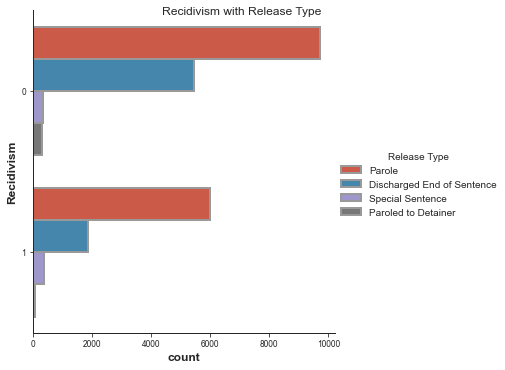

In [243]:
ax = sns.catplot(y="Recidivism", hue="Release Type", kind="count",
            edgecolor=".6",
            data=data, linewidth=2)
ax.fig.suptitle('Recidivism with Release Type')

In [244]:
pd.crosstab(data['Release Type'], data['Recidivism'], normalize='index')

Recidivism,0,1
Release Type,,
Discharged End of Sentence,0.745464,0.254536
Parole,0.619129,0.380871
Paroled to Detainer,0.782609,0.217391
Special Sentence,0.481283,0.518717


##### Deep dive into sex and recidivism

In [245]:
pie_me = data['Sex'].value_counts().reset_index()
pie_me.columns = ['Sex', 'count']

fig = px.pie(
    pie_me, 
    values='count', 
    names='Sex',  
    title='Sex Distribution', 
    width=600, 
    height=600
)

fig.show()

In [246]:
pd.crosstab(data['Sex'], data['Recidivism'], normalize='index')

Recidivism,0,1
Sex,,
Female,0.662342,0.337658
Male,0.654990,0.345010


Text(0.5, 0.98, 'Recidvism Distribution Sorted by Sex and Convicting Offense Type')

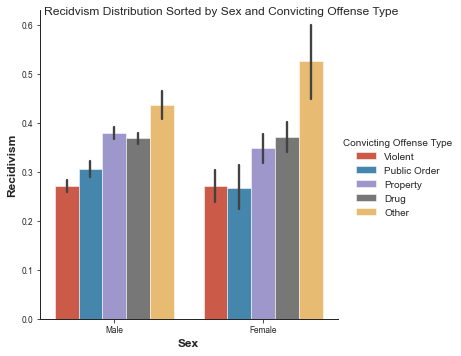

In [247]:
# sex/convicting offense type
ax = sns.catplot(x="Sex", y="Recidivism", hue="Convicting Offense Type", kind="bar", data=data)
ax.fig.suptitle('Recidvism Distribution Sorted by Sex and Convicting Offense Type')

Text(0.5, 0.98, 'Recidivism Sorted by Sex and Release Age')

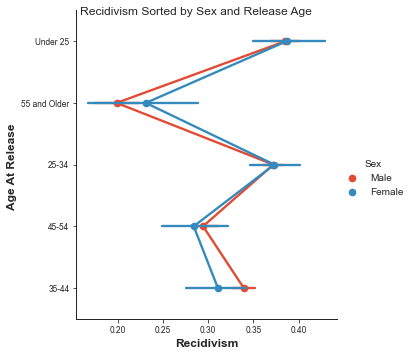

In [248]:
ax = sns.catplot(x="Recidivism", y="Age At Release ", hue="Sex", kind="point", data=data)
ax.fig.suptitle('Recidivism Sorted by Sex and Release Age')

## 6. Time Analysis EDA

#### As stated above, Iowa ranks near the median in the nation for prison population. For the sake of comparison, we'll track population growth for four different states: 
 - Louisiana, 1st in the nation, 680 imprisoned per 100k. 
 - Pennsylvania, 25th, 355 per 100k. 
 - Iowa, 35th, 293 per 100k.
 - Massachusetts, 50th, 133 per 100k. 

In [249]:
st_data.describe()

Prison Population                                          
State              Iowa     Louisiana Massachusetts  Pennsylvania
count         16.000000     16.000000     16.000000     16.000000
mean        8756.687500  19218.375000  10475.812500  45857.250000
std          328.820664   1344.474761    712.536897   4388.824376
min         7962.000000  15059.000000   9038.000000  37641.000000
25%         8655.500000  18773.000000   9866.250000  41675.500000
50%         8736.000000  19420.500000  10534.500000  48187.000000
75%         8876.500000  19919.250000  11134.250000  49308.000000
max         9457.000000  20857.000000  11467.000000  50485.000000

Text(0.5, 1.0, 'Changing Prison Population by Year (2001 - 2016)')

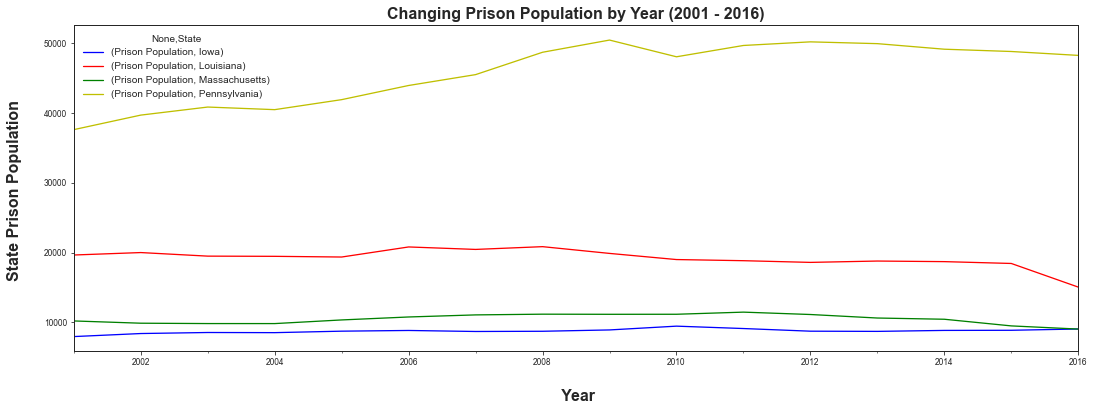

In [250]:
st_data.plot(figsize = (18,6), color = ['b', 'r', 'g', 'y'])

plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("State Prison Population \n", fontsize = 16, fontweight = "bold")
plt.title("Changing Prison Population by Year (2001 - 2016)", fontsize = 16, fontweight = "bold")


Text(0, 0.5, 'State Prison Population \n')

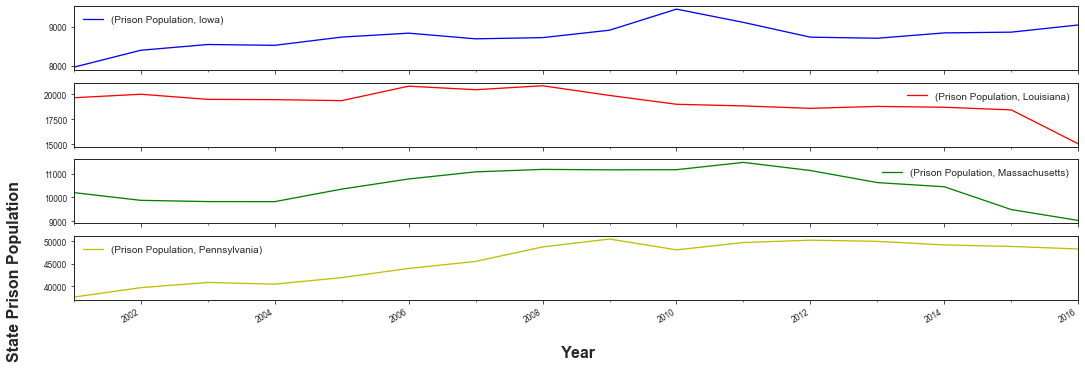

In [251]:
st_data.plot(figsize = (18,6), color = ['b', 'r', 'g', 'y'], subplots='true')

plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("State Prison Population \n", fontsize = 16, fontweight = "bold")



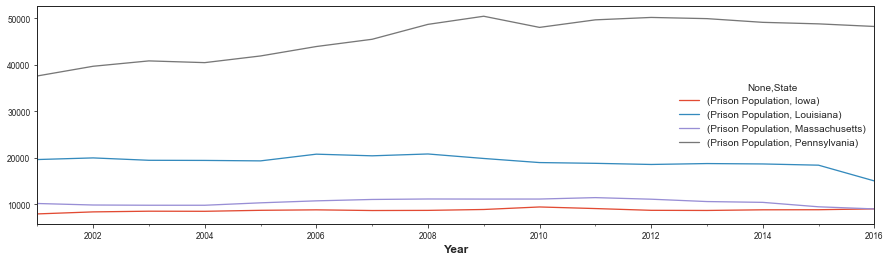

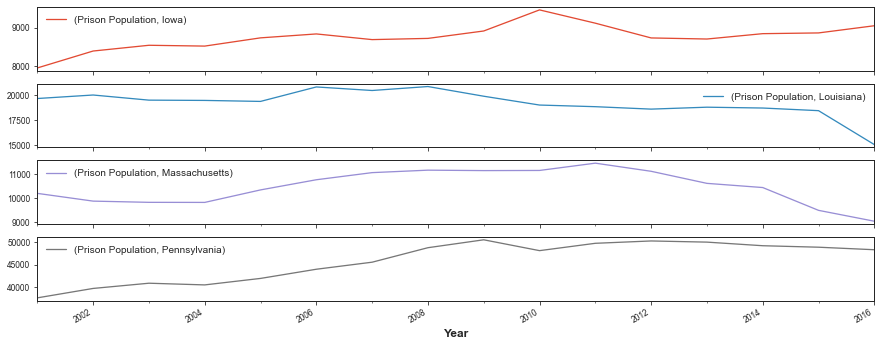

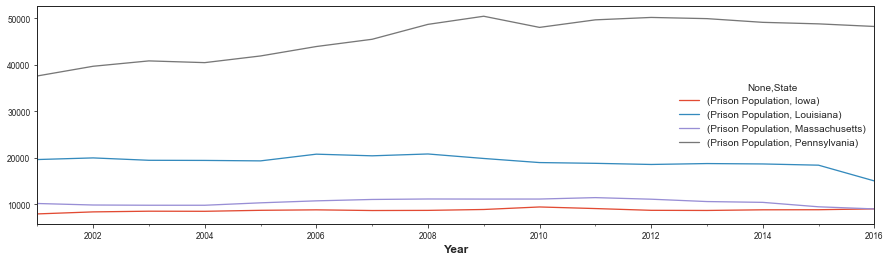

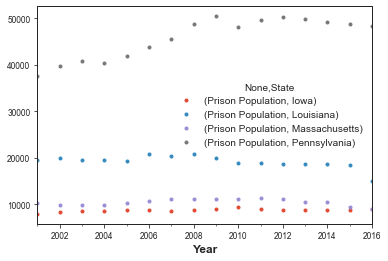

In [252]:
st_data.plot(figsize=(15,4))
st_data.plot(subplots=True, figsize=(15,6))
st_data.plot(figsize=(15,4))
st_data.plot(style='.')

## 7. Prep for Modeling

##### Copying data for modeling notebook

In [253]:
data.to_csv('data_for_modeling.csv', index=False)

#### Creating dummydf

In [254]:
data.head()

,Fiscal Year Released,Recidivism Reporting Year,Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Part of Target Population,Recidivism
0,2010,2013,White - Non-Hispanic,Male,Under 25,D Felony,Violent,Assault,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,Male,55 and Older,D Felony,Public Order,OWI,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,Male,25-34,D Felony,Property,Burglary,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,Male,55 and Older,C Felony,Drug,Trafficking,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,Male,25-34,D Felony,Drug,Trafficking,Parole,Yes,1


In [255]:
mm = MinMaxScaler()

data[['Fiscal Year Released', 'Recidivism Reporting Year']] = mm.fit_transform(data[['Fiscal Year Released', 
                                                               'Recidivism Reporting Year']])

In [256]:
dummydata = pd.get_dummies(data)
dummydata.head()

,Fiscal Year Released,Recidivism Reporting Year,Recidivism,Ethnicity_American Indian or Alaska Native - Hispanic,Ethnicity_American Indian or Alaska Native - Non-Hispanic,Ethnicity_Asian or Pacific Islander - Hispanic,Ethnicity_Asian or Pacific Islander - Non-Hispanic,Ethnicity_Black - Hispanic,Ethnicity_Black - Non-Hispanic,Ethnicity_White - Hispanic,...,Convicting Offense Subtype_Traffic,Convicting Offense Subtype_Trafficking,Convicting Offense Subtype_Vandalism,Convicting Offense Subtype_Weapons,Release Type_Discharged End of Sentence,Release Type_Parole,Release Type_Paroled to Detainer,Release Type_Special Sentence,Part of Target Population_No,Part of Target Population_Yes
0,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.0,0.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0.0,0.0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


#### Creating target and feature variables

In [257]:
y = dummydata['Recidivism']
X = dummydata.drop('Recidivism', axis=1)

#### Train/test split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19365, 68) (19365,)
(4842, 68) (4842,)


In [259]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

0    12711
1     6654
Name: Recidivism, dtype: int64


0    3167
1    1675
Name: Recidivism, dtype: int64


In [260]:
print('Train Group Shape: ', X_train.shape)
print('Test Group Shape: ', X_test.shape)

Train Group Shape:  (19365, 68)
Test Group Shape:  (4842, 68)


## 8. Preliminary Model Analysis

In [261]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.659592 (0.002957)
KNN: 0.623909 (0.008770)
CART: 0.622206 (0.009531)
RFC: 0.629436 (0.008880)
SVM: 0.656287 (0.001701)
NB: 0.364317 (0.005191)


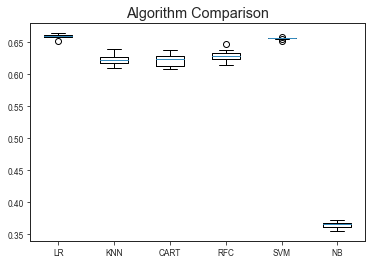

In [262]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### Based on our preliminary model analysis, we'll narrow our approach to: 
    - Logistic Regression
    - Decision Tree Classification
    - Random Forest Classification
    - Support Vector Machine

### Logistic Regression 

In [263]:
# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(X_train, y_train)

LogisticRegression()

In [264]:
# Predict
y_pred_lreg = lreg.predict(X_test)

In [265]:
# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[3027  140]
 [1522  153]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.96      0.78      3167
           1       0.52      0.09      0.16      1675

    accuracy                           0.66      4842
   macro avg       0.59      0.52      0.47      4842
weighted avg       0.62      0.66      0.57      4842

--------------------------------------------------------------------------------
Accuracy 65.68 %


Confusion matrix
[[3027  140]
 [1522  153]]


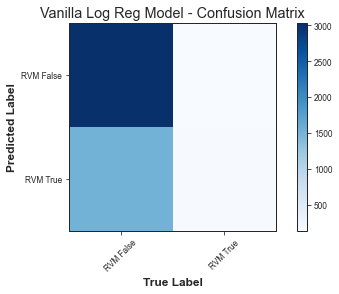

In [266]:
def plot_confusion_matrix(lreg, names, title="Vanilla Log Reg Model - Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    
cm = confusion_matrix(y_test, y_pred_lreg)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["RVM False","RVM True"])

In [267]:
print("Accuracy on training set: {:.3f}".format(lreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lreg.score(X_test, y_test)))

Accuracy on training set: 0.662
Accuracy on test set: 0.657


#### Our data is highly imbalanced. Let's try other modeling methods before oversampling. 

### Decision Tree Classifier

In [268]:
# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [269]:
# Predict
y_pred_dtree = dtree.predict(X_test)

In [270]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report','\n',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[2576  591]
 [1153  522]]
--------------------------------------------------------------------------------
Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      3167
           1       0.47      0.31      0.37      1675

    accuracy                           0.64      4842
   macro avg       0.58      0.56      0.56      4842
weighted avg       0.61      0.64      0.62      4842

--------------------------------------------------------------------------------
Accuracy 63.98 %


Confusion matrix
[[2576  591]
 [1153  522]]


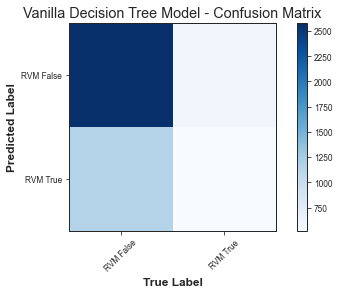

In [271]:
def plot_confusion_matrix(dtree, names, title="Vanilla Decision Tree Model - Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    
cm = confusion_matrix(y_test, y_pred_dtree)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["RVM False","RVM True"])

In [272]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.774
Accuracy on test set: 0.640


### Random Forest Classifier

In [273]:
# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [274]:
# Predict
y_pred_rfc = rfc.predict(X_test)

In [275]:
# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[2558  609]
 [1145  530]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      3167
           1       0.47      0.32      0.38      1675

    accuracy                           0.64      4842
   macro avg       0.58      0.56      0.56      4842
weighted avg       0.61      0.64      0.62      4842

--------------------------------------------------------------------------------
Accuracy 63.78 %


Confusion matrix
[[2558  609]
 [1145  530]]


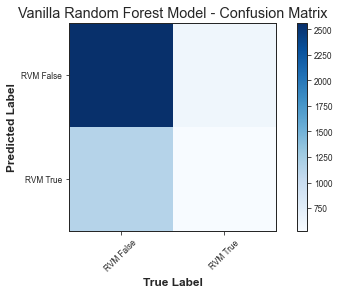

In [276]:
def plot_confusion_matrix(rfc, names, title="Vanilla Random Forest Model - Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    
cm = confusion_matrix(y_test, y_pred_rfc)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["RVM False","RVM True"])

In [277]:
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.774
Accuracy on test set: 0.638


### Support Vector Machine Classifier

In [278]:
# Create model object
svc = SVC(kernel='linear', gamma='auto')

# Fit model to training data
svc.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [279]:
# Predict
y_pred_svc = svc.predict(X_test)

In [280]:
# Score Ity
print('SVC')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', rf_accuracy,'%')

SVC


Confusion Matrix
[[3086   81]
 [1598   77]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.97      0.79      3167
           1       0.49      0.05      0.08      1675

    accuracy                           0.65      4842
   macro avg       0.57      0.51      0.44      4842
weighted avg       0.60      0.65      0.54      4842

--------------------------------------------------------------------------------
Accuracy 65.32 %


In [281]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.658
Accuracy on test set: 0.653


### Preliminary Model Analysis Summary

In [282]:
print('*Log Reg Scores*', '\n', classification_report(y_test, y_pred_lreg))
print('------------------------------------------------------------------------')
print('*Decision Tree Scores*', '\n', classification_report(y_test, y_pred_dtree))
print('------------------------------------------------------------------------')
print('*RFC Scores*', '\n', classification_report(y_test, y_pred_rfc))
print('------------------------------------------------------------------------')
print('*SVM Scores*', '\n', classification_report(y_test, y_pred_svc))

*Log Reg Scores* 
               precision    recall  f1-score   support

           0       0.67      0.96      0.78      3167
           1       0.52      0.09      0.16      1675

    accuracy                           0.66      4842
   macro avg       0.59      0.52      0.47      4842
weighted avg       0.62      0.66      0.57      4842

------------------------------------------------------------------------
*Decision Tree Scores* 
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      3167
           1       0.47      0.31      0.37      1675

    accuracy                           0.64      4842
   macro avg       0.58      0.56      0.56      4842
weighted avg       0.61      0.64      0.62      4842

------------------------------------------------------------------------
*RFC Scores* 
               precision    recall  f1-score   support

           0       0.69      0.81      0.74      3167
           1       0.47      0.3

#### Preliminary Model Analysis Summary

##### Regardless of model, our data is highly imbalanced. Before we finalize our model selection, we need to: 
    - Introduce SMOTE to fix our sampling issues. 
    - Inspect feature importance. 
    - Monitor overfitting. 

## 9A. Model Tuning with SMOTE

#### Introducing SMOTE to oversample the minority class. 

In [283]:

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train1, y_train1 = smote.fit_sample(X_train, y_train) 
#X1, y1 = smote.fit_resample(X, y)

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train).value_counts()) 

Original class distribution: 

0    15878
1     8329
Name: Recidivism, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    12711
1     6654
Name: Recidivism, dtype: int64


### Logistic Regression with SMOTE

In [284]:
# Create instance of model
lreg1 = LogisticRegression()

# Pass training data into model
lreg1.fit(X_train1, y_train1)

LogisticRegression()

In [285]:
# Predict
y_pred_lreg1 = lreg1.predict(X_test)

##### Checking scores

In [286]:
lreg1_score = np.mean(cross_val_score(lreg1, X, y, cv=kfold, scoring='roc_auc'))

# Confusion Matrix
print('Logistic Regression with SMOTE')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg1))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg1))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg1) * 100,2)
print('Accuracy', logreg_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(lreg1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(lreg1.score(X_test, y_test)))
print('\n')
print("=== All AUC Scores ===")
print(lreg1_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LogReg with SMOTE and Gridsearch: ", lreg1_score.mean())

Logistic Regression with SMOTE


Confusion Matrix
[[2059 1108]
 [ 778  897]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      3167
           1       0.45      0.54      0.49      1675

    accuracy                           0.61      4842
   macro avg       0.59      0.59      0.59      4842
weighted avg       0.63      0.61      0.62      4842

--------------------------------------------------------------------------------
Accuracy 61.05 %
Accuracy on training set: 0.644
Accuracy on test set: 0.610


=== All AUC Scores ===
0.6357707268836535


=== Mean AUC Score ===
Mean AUC Score - LogReg with SMOTE and Gridsearch:  0.6357707268836535


### Decision Tree Classifier with SMOTE

In [287]:
# Create model object
dtree1 = DecisionTreeClassifier()

# Fit to training sets
dtree1.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [288]:
y_pred_dtree1 = dtree1.predict(X_test)

In [289]:
dtree1_score = np.mean(cross_val_score(dtree1, X, y, cv=kfold, scoring='roc_auc'))

# Score It
print('Decision Trees with SMOTE')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree1))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_dtree1))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_dtree1)*100,2)
print('Accuracy', rf_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(dtree1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(dtree1.score(X_test, y_test)))
print('\n')
print("=== All AUC Scores ===")
print(dtree1_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LogReg with SMOTE and Gridsearch: ", dtree1_score.mean())

Decision Trees with SMOTE


Confusion Matrix
[[2199  968]
 [ 915  760]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3167
           1       0.44      0.45      0.45      1675

    accuracy                           0.61      4842
   macro avg       0.57      0.57      0.57      4842
weighted avg       0.61      0.61      0.61      4842

--------------------------------------------------------------------------------
Accuracy 61.11 %
Accuracy on training set: 0.793
Accuracy on test set: 0.611


=== All AUC Scores ===
0.5876228209280805


=== Mean AUC Score ===
Mean AUC Score - LogReg with SMOTE and Gridsearch:  0.5876228209280805


### Random Forest Classifier with SMOTE

In [290]:
# Create model object
rfc1 = RandomForestClassifier(n_estimators = 100, random_state=42)

# Fit model to training data
rfc1.fit(X_train1,y_train1)

RandomForestClassifier(random_state=42)

In [291]:
# Predict
y_pred_rfc1 = rfc1.predict(X_test)

##### Checking scores

In [292]:
rfc1_score = np.mean(cross_val_score(rfc1, X, y, cv=kfold, scoring='roc_auc'))

# Score It
print('Random Forest with SMOTE')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc1))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc1))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc1)*100,2)
print('Accuracy', rf_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(rfc1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(rfc1.score(X_test, y_test)))
print('\n')
print("=== All AUC Scores ===")
print(rfc1_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LogReg with SMOTE and Gridsearch: ", rfc1_score.mean())

Random Forest with SMOTE


Confusion Matrix
[[2128 1039]
 [ 848  827]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      3167
           1       0.44      0.49      0.47      1675

    accuracy                           0.61      4842
   macro avg       0.58      0.58      0.58      4842
weighted avg       0.62      0.61      0.61      4842

--------------------------------------------------------------------------------
Accuracy 61.03 %
Accuracy on training set: 0.793
Accuracy on test set: 0.610


=== All AUC Scores ===
0.6068383923132804


=== Mean AUC Score ===
Mean AUC Score - LogReg with SMOTE and Gridsearch:  0.6068383923132804


##### Model is overfitting. We will check these metrics after gridsearching. 

### Support Vector Machine Classifier with SMOTE

In [293]:
# Create model object
svc1 = SVC(kernel='linear', gamma='auto')

# Fit model to training data
svc1.fit(X_train1,y_train1)

SVC(gamma='auto', kernel='linear')

In [294]:
# Predict
y_pred_svc1 = svc1.predict(X_test)

In [295]:
svc1_score = np.mean(cross_val_score(svc1, X, y, cv=kfold, scoring='roc_auc'))

# Score It
print('SVC with SMOTE')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc1))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_svc1))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_svc1)*100,2)
print('Accuracy', rf_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(svc1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(svc1.score(X_test, y_test)))
print('\n')
print("=== All AUC Scores ===")
print(svc1_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LogReg with SMOTE and Gridsearch: ", svc1_score.mean())

SVC with SMOTE


Confusion Matrix
[[1813 1354]
 [ 650 1025]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      3167
           1       0.43      0.61      0.51      1675

    accuracy                           0.59      4842
   macro avg       0.58      0.59      0.57      4842
weighted avg       0.63      0.59      0.60      4842

--------------------------------------------------------------------------------
Accuracy 58.61 %
Accuracy on training set: 0.638
Accuracy on test set: 0.586


=== All AUC Scores ===
0.5403669477325722


=== Mean AUC Score ===
Mean AUC Score - LogReg with SMOTE and Gridsearch:  0.5403669477325722


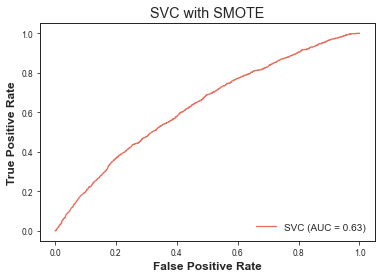

In [340]:
ax = plt.gca()
svc_disp = plot_roc_curve(svc1, X_test, y_test, ax=ax, alpha=0.8)
plt.title('SVC with SMOTE')
plt.show()


## 9B. Model Tuning with Feature Selection, Hyperparameter Tuning via Gridsearch

### Logistic Regression with SMOTE & Gridsearch

In [296]:
print('Parameters currently in use:\n')
print(lreg.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [297]:
# Create instance of model
lreg2 = LogisticRegression()


##### Creating paramter grid for search

In [298]:
lreg2_grid = {
    'fit_intercept': [True, False],
    'C': [1, 3, 5],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 150],
    'random_state': [None, 1, 3]
}

In [299]:
lreg2_grid_search = GridSearchCV(lreg2, lreg2_grid)
lreg2_grid_search.fit(X_train1, y_train1)

print(f"Training Accuracy: {lreg2_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {lreg2_grid_search.best_params_}")

Training Accuracy: 63.87%

Optimal Parameters: {'C': 1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 150, 'random_state': None, 'solver': 'lbfgs'}


In [300]:
# Predict
lreg2_grid_search_pred = lreg2_grid_search.predict(X_test)

##### Checking metrics and scores 

In [301]:
lreg2_score = np.mean(cross_val_score(lreg2, X, y, cv=kfold, scoring='roc_auc'))

# Confusion Matrix
print('Logistic Regression with SMOTE and Gridsearch')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, lreg2_grid_search_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,lreg2_grid_search_pred))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, lreg2_grid_search_pred) * 100,2)
print('Accuracy', logreg_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(lreg2_grid_search.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(lreg2_grid_search.score(X_test, y_test)))
print('\n')
print("=== All AUC Scores ===")
print(lreg2_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LogReg with SMOTE and Gridsearch: ", lreg2_score.mean())

Logistic Regression with SMOTE and Gridsearch


Confusion Matrix
[[2052 1115]
 [ 775  900]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.65      0.68      3167
           1       0.45      0.54      0.49      1675

    accuracy                           0.61      4842
   macro avg       0.59      0.59      0.59      4842
weighted avg       0.63      0.61      0.62      4842

--------------------------------------------------------------------------------
Accuracy 60.97 %
Accuracy on training set: 0.645
Accuracy on test set: 0.610


=== All AUC Scores ===
0.6357707268836535


=== Mean AUC Score ===
Mean AUC Score - LogReg with SMOTE and Gridsearch:  0.6357707268836535


### Random Forest Classifier with SMOTE, Feature Selection and Gridsearch

In [302]:
print('Parameters currently in use:\n')
print(rfc.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


##### Creating feature importance function

In [303]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

##### Checking feature importance

In [304]:
base_imp = imp_df(X_train1.columns, rfc1.feature_importances_)
base_imp

,feature,feature_importance
0,Fiscal Year Released,0.122041
1,Recidivism Reporting Year,0.121263
2,Ethnicity_White - Non-Hispanic,0.043012
3,Ethnicity_Black - Non-Hispanic,0.040510
4,Age At Release _35-44,0.036250
...,...,...
63,Convicting Offense Subtype_Animals,0.000156
64,Convicting Offense Classification_A Felony,0.000068
65,Convicting Offense Classification_Sexual Preda...,0.000045
66,Convicting Offense Classification_Simple Misde...,0.000026


###### Using feature importance to narrow our search. 

In [305]:
#Transforming our variables for our RFC model. 
rfc1.feature_importances_  
model = SelectFromModel(rfc1, threshold=0.04, prefit=True)
X_new1 = model.transform(X)
X_new1.shape           

(24207, 4)

##### Using our new x values for train/test split

In [306]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new1, y, test_size=0.2, random_state=42)
print(X_train2.shape, y_train.shape)
print(X_test2.shape, y_test.shape)

(19365, 4) (19365,)
(4842, 4) (4842,)


##### Applying SMOTE to new x, Y

In [307]:
X_train2, y_train2 = smote.fit_sample(X_train2, y_train2) 

In [308]:
# Create instance of model
rfc2 = RandomForestClassifier(random_state=42, n_estimators = 100)


##### Creating parameter grid to search through

In [309]:
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

##### Fitting gridsearch RFC

In [310]:
rf_grid_search = GridSearchCV(rfc2, rf_param_grid, verbose=2)
rf_grid_search.fit(X_train2, y_train2)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=150 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=

[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   1.0s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   1.0s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   1.0s
[CV] class_weight=None, c

[CV]  class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150, total=   0.9s
[CV] class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150, total=   0.8s
[CV] class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150, total=   0.8s
[CV] class_weight=None, c

[CV]  class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  class_weight=None, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] class_weight=None, crit

[CV]  class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150, total=   3.4s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150, total=   1.1s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] cl

[CV]  class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] cl

[CV]  class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  class_weight=None, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] cl

[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.6

[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=150, total=   0.8s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=200, tot

[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=3, min_samples_split=10, n_estimators=150, tot

[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=150, total=   0.8s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=150, total=   0.8s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.9

[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_e

[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=2

[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   0.7s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   0.8s
[CV] class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, min_samples_leaf=5, min_samples_spli

[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   2.0s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsampl

[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced_subsampl

[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   1.1s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=150, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced_subsampl

[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.5s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_

[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   2.0s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  class_

[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.9s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.9s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  class_

[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=150 
[CV]  class_

[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.5s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=150, total=   1.5s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 13.7min finished


Training Accuracy: 54.98%

Optimal Parameters: {'class_weight': None, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [311]:
# Predict
rfc2_grid_search_pred = rf_grid_search.predict(X_test2)

##### Checking scores

In [312]:
rfc2_score = cross_val_score(rfc2, X_new1, y, cv=kfold, scoring='roc_auc')

# Confusion Matrix
print('RFC Tuned')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test2, rfc2_grid_search_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test2, rfc2_grid_search_pred))

# Accuracy
print('--'*40)
rfc2_accuracy = round(accuracy_score(y_test2, rfc2_grid_search_pred ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(rf_grid_search.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(rf_grid_search.score(X_test2, y_test2)))
print('\n')
print("=== All AUC Scores ===")
print(rfc2_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest with SMOTE and Gridsearch: ", rfc2_score.mean())

RFC Tuned


Confusion Matrix
[[1773 1394]
 [ 811  864]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.56      0.62      3167
           1       0.38      0.52      0.44      1675

    accuracy                           0.54      4842
   macro avg       0.53      0.54      0.53      4842
weighted avg       0.58      0.54      0.56      4842

--------------------------------------------------------------------------------
Accuracy 60.97 %
Accuracy on training set: 0.550
Accuracy on test set: 0.545


=== All AUC Scores ===
[0.56 0.57 0.55 0.58 0.54 0.56 0.56 0.57 0.55 0.55]


=== Mean AUC Score ===
Mean AUC Score - Random Forest with SMOTE and Gridsearch:  0.5590846577277939


##### Model Analysis: 
- Model overfitting has improved. 
- Recall has improved. 
- Scores still subpar. 

Confusion matrix
[[1773 1394]
 [ 811  864]]


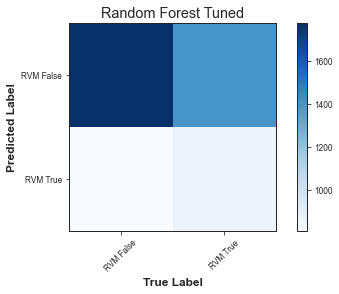

In [313]:
def plot_confusion_matrix(rfc1, names, title="Random Forest Tuned", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    
cm = confusion_matrix(y_test2, rfc2_grid_search_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["RVM False","RVM True"])

### SVC with SMOTE and Gridsearch

In [314]:
print('Parameters currently in use:\n')
print(svc1.get_params())

Parameters currently in use:

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [315]:
svc2 = SVC(kernel='linear', gamma='auto', random_state=42)

##### Creating parameter gridsearch

In [316]:
svc_param_grid = {'C': [0.1, 1, 10, 25], 
              'gamma': [1, 0.1, 0.01],
             'kernel': ['linear', 'rbf']} 

##### Fitting SVC to gridsearch

In [317]:
svc_search = GridSearchCV(svc2, svc_param_grid, refit=True, verbose=2, cv=3)
svc_search.fit(X_train1, y_train1)

print(f"Training Accuracy: {svc_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {svc_search.best_params_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=0.1, gamma=1, kernel=linear, total=  29.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.5s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=  30.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=  33.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  47.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  42.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  52.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=  31.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=  35.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ........................ C=25, gamma=1, kernel=rbf, total= 1.6min
[CV] C=25, gamma=0.1, kernel=linear ..................................
[CV] ................... C=25, gamma=0.1, kernel=linear, total=  56.5s
[CV] C=25, gamma=0.1, kernel=linear ..................................
[CV] ................... C=25, gamma=0.1, kernel=linear, total=  56.9s
[CV] C=25, gamma=0.1, kernel=linear ..................................
[CV] ................... C=25, gamma=0.1, kernel=linear, total= 2.2min
[CV] C=25, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=25, gamma=0.1, kernel=rbf, total=  43.3s
[CV] C=25, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=25, gamma=0.1, kernel=rbf, total=  47.7s
[CV] C=25, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=25, gamma=0.1, kernel=rbf, total=  53.4s
[CV] C=25, gamma=0.01, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 65.4min finished


Training Accuracy: 65.58%

Optimal Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [318]:
# Predict
svc_search_pred = svc_search.predict(X_test)

##### Checking scores

In [319]:
svc2_score = cross_val_score(svc2, X, y, cv=kfold, scoring='roc_auc')

# Confusion Matrix
print('SVC with SMOTE and Gridsearch')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, svc_search_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test, svc_search_pred))

# Accuracy
print('--'*40)
rfc2_accuracy = round(accuracy_score(y_test, svc_search_pred ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(svc_search.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(svc_search.score(X_test, y_test)))
print('\n')
print("=== All AUC Scores ===")
print(svc2_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - SVC with SMOTE and Gridsearch: ", svc2_score.mean())

SVC with SMOTE and Gridsearch


Confusion Matrix
[[1966 1201]
 [ 794  881]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      3167
           1       0.42      0.53      0.47      1675

    accuracy                           0.59      4842
   macro avg       0.57      0.57      0.57      4842
weighted avg       0.61      0.59      0.60      4842

--------------------------------------------------------------------------------
Accuracy 60.97 %
Accuracy on training set: 0.761
Accuracy on test set: 0.588


=== All AUC Scores ===
[0.55 0.52 0.56 0.52 0.58 0.58 0.51 0.55 0.5  0.54]


=== Mean AUC Score ===
Mean AUC Score - SVC with SMOTE and Gridsearch:  0.5403669477325722


### LinearSVC with SMOTE, Gridsearch and Feature Selection

In [320]:
print(X.shape)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new2 = model.transform(X)
X_new2.shape


(24207, 68)


(24207, 29)

##### Creating new train/test split with feature selected X

In [321]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new2, y, test_size=0.2, random_state=42)
print(X_train2.shape, y_train.shape)
print(X_test2.shape, y_test.shape)

(25422, 4) (19365,)
(4842, 4) (4842,)


##### SMOTE for new X and y train

In [322]:
X_train3, y_train3 = smote.fit_sample(X_train3, y_train3) 

##### Preparing model for gridsearch

In [323]:
# Create instance of model
lsvc1 = LinearSVC(C=0.01, penalty="l1", dual=False)


##### Creating parameter grid

In [324]:
lsvc1_param_grid = {'C': [0.1, 1, 10], 
              'penalty': ['l1', 'l2'],
             'dual': [False, True]} 

###### Gridsearch

In [325]:
lsvc1_search = GridSearchCV(lsvc1, lsvc_param_grid, refit=True, verbose=2, cv=3)
lsvc1_search.fit(X_train3, y_train3)

print(f"Training Accuracy: {lsvc_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {lsvc_search.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, dual=False, penalty=l1 ...................................
[CV] .................... C=0.1, dual=False, penalty=l1, total=   0.1s
[CV] C=0.1, dual=False, penalty=l1 ...................................
[CV] .................... C=0.1, dual=False, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, penalty=l1 ...................................
[CV] .................... C=0.1, dual=False, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, penalty=l2 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=0.1, dual=False, penalty=l2, total=   0.1s
[CV] C=0.1, dual=False, penalty=l2 ...................................
[CV] .................... C=0.1, dual=False, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, penalty=l2 ...................................
[CV] .................... C=0.1, dual=False, penalty=l2, total=   0.1s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] ..................... C=0.1, dual=True, penalty=l1, total=   0.0s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] ..................... C=0.1, dual=True, penalty=l1, total=   0.0s
[CV] C=0.1, dual=True, penalty=l1 ....................................
[CV] ..................... C=0.1, dual=True, penalty=l1, total=   0.0s
[CV] C=0.1, dual=True, penalty=l2 ....................................
[CV] ..................... C=0.1, dual=True, penalty=l2, total=   0.0s
[CV] C=0.1, dual=True, penalty=l2 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.3s finished


In [326]:
# Predict
lsvc1_search_pred = lsvc1_search.predict(X_test3)

##### Check metrics and scores

In [341]:
lsvc1_score = np.mean(cross_val_score(lsvc1, X_new2, y, cv=kfold, scoring='roc_auc'))

# Score It
print('LinearSVC with SMOTE and Feature Selection')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test3, lsvc1_search_pred))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test3, lsvc1_search_pred))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test3, lsvc1_search_pred)*100,2)
print('Accuracy', rf_accuracy,'%')

print("Accuracy on training set: {:.3f}".format(lsvc1_search.score(X_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(lsvc1_search.score(X_test3, y_test3)))
print('\n')
print("=== All AUC Scores ===")
print(lsvc1_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LinearSVC with SMOTE, Gridsearch and Feature Selection: ", lsvc1_score.mean())

LinearSVC with SMOTE and Feature Selection


Confusion Matrix
[[1782 1385]
 [ 616 1059]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.56      0.64      3167
           1       0.43      0.63      0.51      1675

    accuracy                           0.59      4842
   macro avg       0.59      0.60      0.58      4842
weighted avg       0.64      0.59      0.60      4842

--------------------------------------------------------------------------------
Accuracy 58.67 %
Accuracy on training set: 0.602
Accuracy on test set: 0.587


=== All AUC Scores ===
0.632030270676512


=== Mean AUC Score ===
Mean AUC Score - LinearSVC with SMOTE, Gridsearch and Feature Selection:  0.632030270676512


Confusion matrix
[[1810 1357]
 [ 630 1045]]


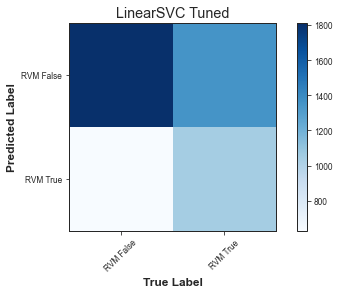

In [328]:
def plot_confusion_matrix(lsvc1, names, title="LinearSVC Tuned", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    
cm = confusion_matrix(y_test3, lsvc1_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, ["RVM False","RVM True"])

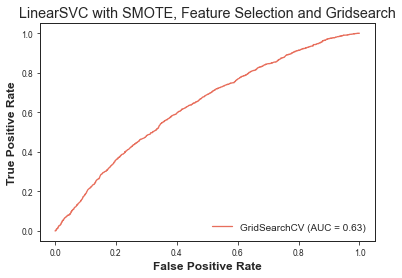

In [338]:
ax = plt.gca()
lsvc1_disp = plot_roc_curve(lsvc1_search, X_test3, y_test3, ax=ax, alpha=0.8)
plt.title('LinearSVC with SMOTE, Feature Selection and Gridsearch')
plt.show()


## 10. Model Review and Conclusion

### Best Performing Models

In [329]:

print('SVC with SMOTE')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc1))


print('\n')
print('Classification Report')
print(classification_report(y_test, y_pred_svc1))
print('\n')
print('--'*40)

# Score It
print('LinearSVC with SMOTE and Feature Selection')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test3, lsvc1_search_pred))
print('\n')

# Classification report

print('Classification Report')
print(classification_report(y_test3, lsvc1_search_pred))


SVC with SMOTE


Confusion Matrix
[[1813 1354]
 [ 650 1025]]


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      3167
           1       0.43      0.61      0.51      1675

    accuracy                           0.59      4842
   macro avg       0.58      0.59      0.57      4842
weighted avg       0.63      0.59      0.60      4842



--------------------------------------------------------------------------------
LinearSVC with SMOTE and Feature Selection


Confusion Matrix
[[1782 1385]
 [ 616 1059]]


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.56      0.64      3167
           1       0.43      0.63      0.51      1675

    accuracy                           0.59      4842
   macro avg       0.59      0.60      0.58      4842
weighted avg       0.64      0.59      0.60      4842



### Conclusion
- Despite iteratively test multiple classification models, it's become apparent, across multiple metrics, there is not enough data to classify recidivism with our current data. 
    - While the Bureau of Justice Statistics offers recidivism tools on its website, I was unable to obtain any actionable information while constructing this project. These models will be updated with further data. 
- As we want to identify as many recidivists as possible, broadly, our models were anchored around recall. However, other metrics were considered in model selection and tuning. Specifically, precision and AUC score. 
    - The above summary illustrates our models were never able to surpass 65% in any metric in a reproducible fashion. 

- With our current lack of data, our best performing models were: 
    - SVC with SMOTE
    - LinearSVC with SMOTE, Feature Selection and Gridsarch